In [105]:
# End to end Linear Regression using Boston Housing Dataset

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
boston = pd.read_csv('data/boston_house_prices.csv', header=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [108]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [109]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [110]:
# rename target column

boston.rename(columns={'MEDV': 'PRICE'}, inplace=True)

In [111]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [112]:
# check for missing values

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## EDA

In [113]:
# correlation matrix

correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


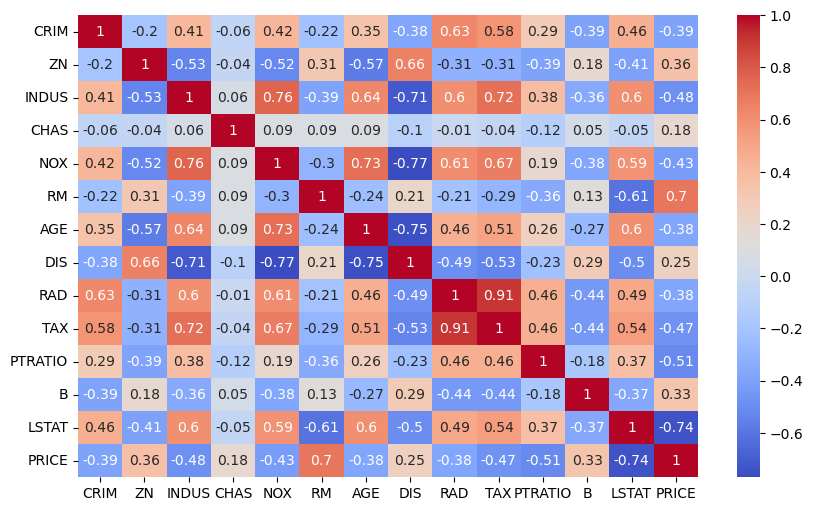

In [114]:
# heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

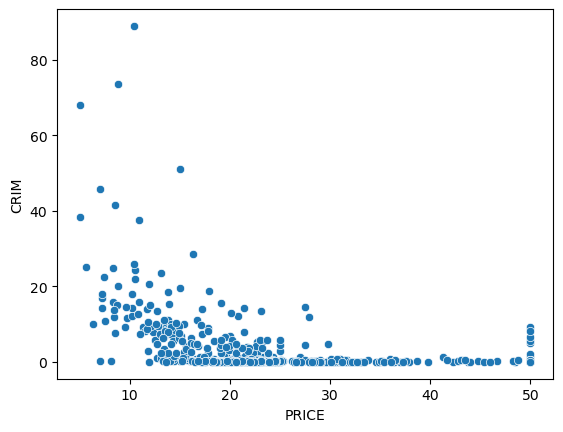

In [115]:
# scatter plot

sns.scatterplot(x = 'PRICE', y = 'CRIM', data=boston)
plt.show()


In [116]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

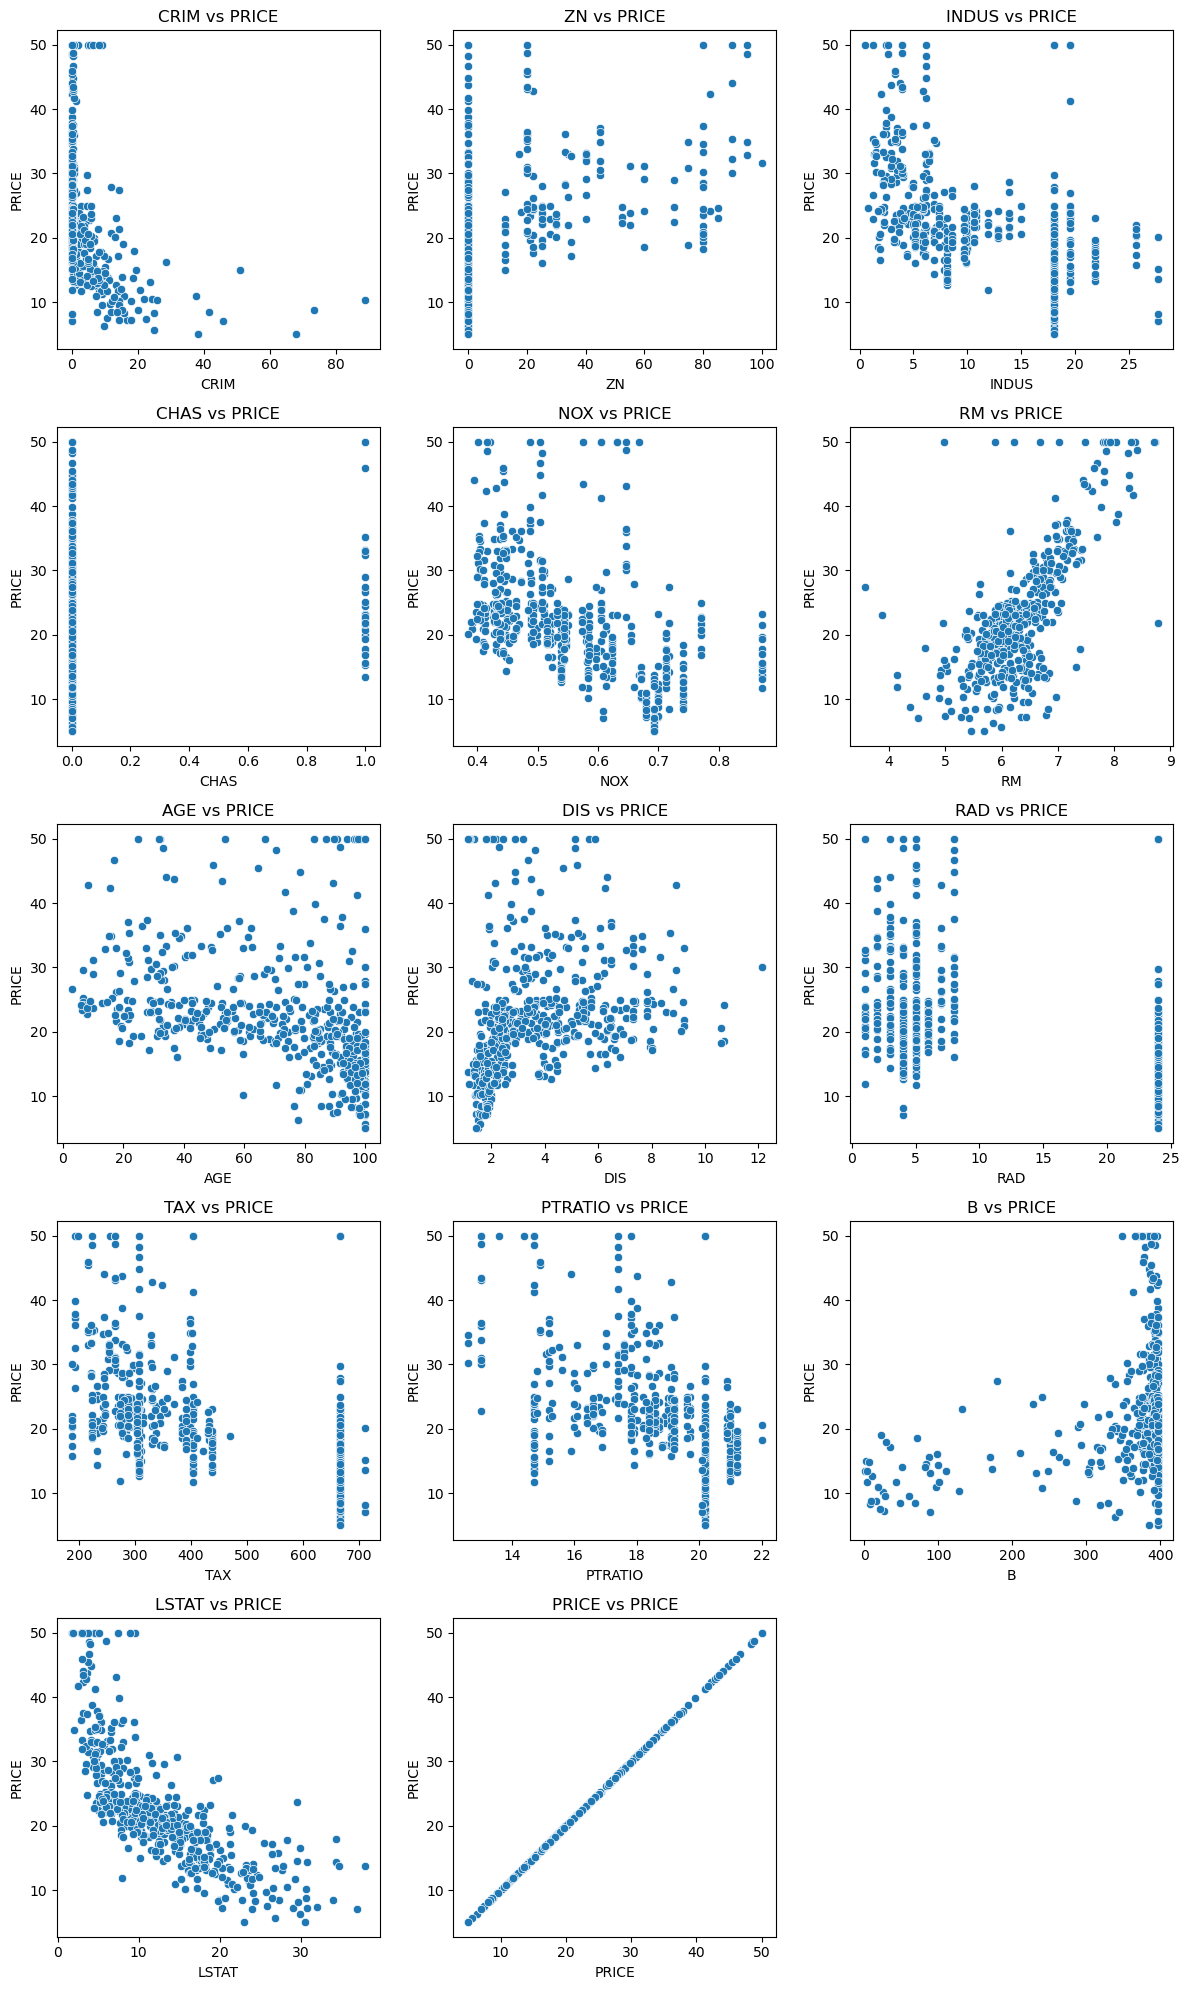

In [117]:
# scatter plot for using seaborn

cols = 3
rows = 5

fig = plt.figure(figsize=(cols*4, rows*4))

for i, col in enumerate(boston.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.scatterplot(x = boston[col], ax = ax, y=boston['PRICE'])
    ax.set_title(col + ' vs PRICE')

fig.tight_layout()  
plt.show()

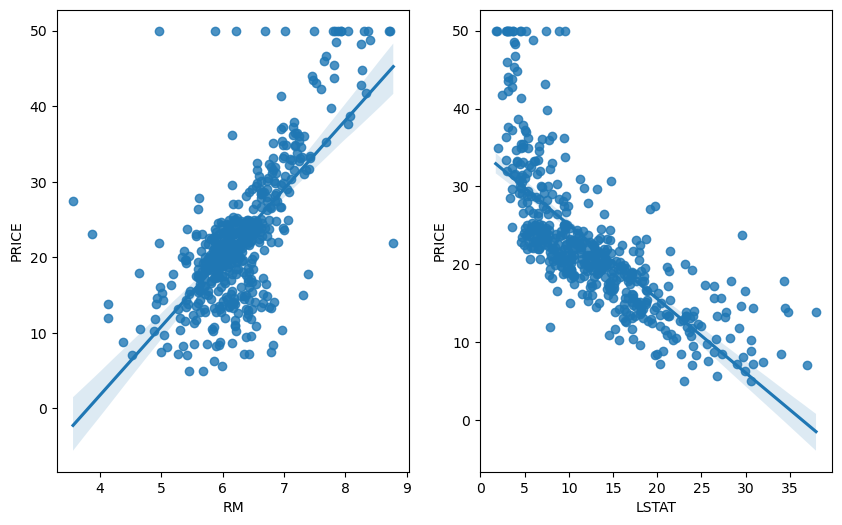

In [118]:
# regression plot

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.regplot(x='RM', y='PRICE', data=boston, ax=ax[0])

sns.regplot(x='LSTAT', y='PRICE', data=boston, ax=ax[1])

plt.show()

## CREATE MODEL

In [119]:
# X and y

X = boston.drop('PRICE', axis=1)
y = boston['PRICE']

In [120]:
X.shape, y.shape

((506, 13), (506,))

In [121]:
# split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
# shape of the data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [123]:
# standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # fit and transform on training data only to avoid data leakage

In [124]:
# transform the test data using the same scaler 

X_test_scaled = scaler.transform(X_test) # only transform on test data because we have already fit on training data

In [125]:
# print the first row of the scaled data to check if it is scaled properly
# convert the numpy array to pandas dataframe for better visualization

pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


### Train The Model

In [126]:
# linear regression

from sklearn.linear_model import LinearRegression

# instantiate the model

model_lr = LinearRegression()

# fit the model

model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [127]:
# check the coefficients

model_lr.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [128]:
# check the intercept

model_lr.intercept_

23.01581920903955

In [129]:
# parameters of the model 

model_lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [130]:
# predict the target

y_pred = model_lr.predict(X_test_scaled)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [131]:
# print the price of the first house in the test data

print(y_test.iloc[0])

# print the predicted price of the first house in the test data

print(y_pred[0])

23.6
28.648960046324138


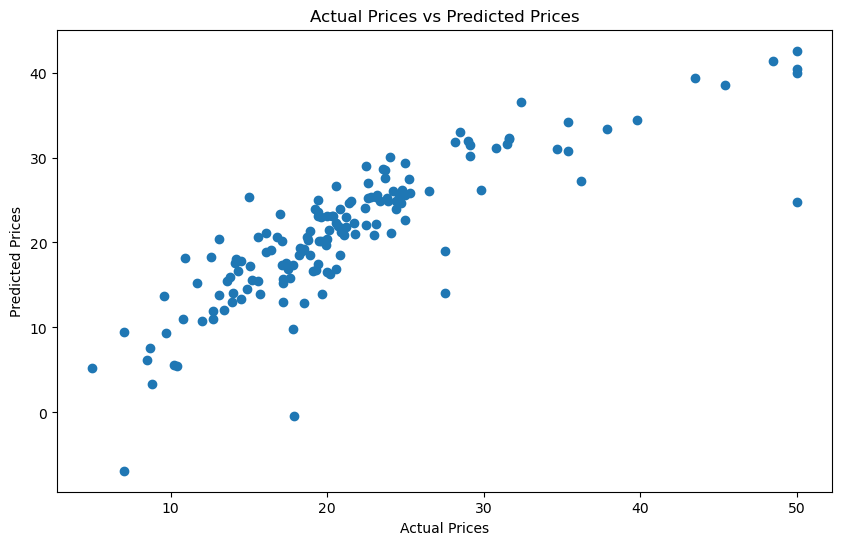

In [132]:
# plot the predicted values against the actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [133]:
# check the residuals, meaning the difference between the actual and predicted values

residuals = y_test - y_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

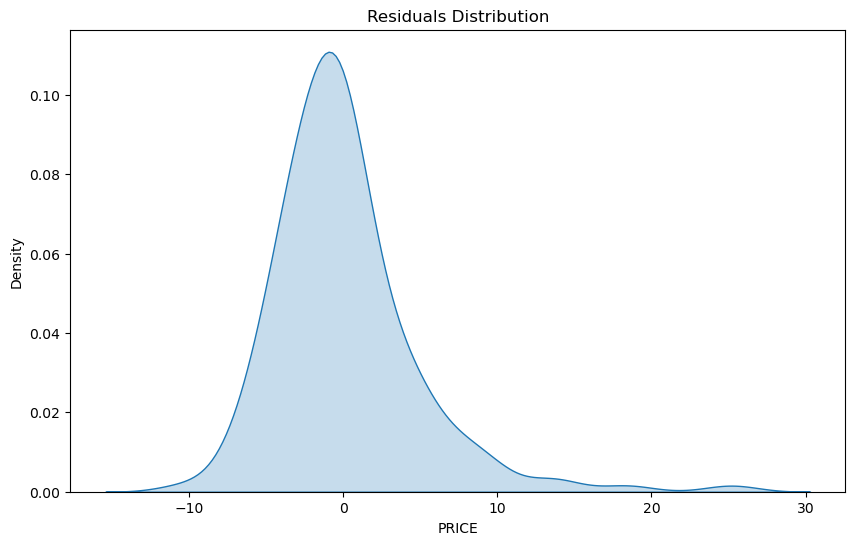

In [134]:
# plot the residuals

plt.figure(figsize=(10, 6))
# sns.histplot(residuals, kde=True)
sns.kdeplot(residuals, fill=True)
# sns.displot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [135]:
# the residuals plot above should be normally distributed and centered around zero for a good model fit

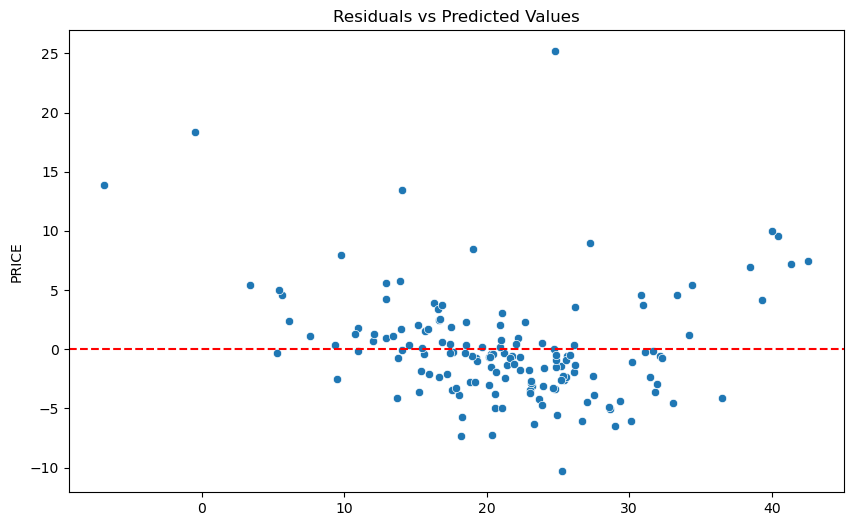

In [136]:
# check the distribution of the residuals against the predicted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

In [137]:
# above plot should not show any pattern, if it does, then the model is not capturing the underlying patterns in the data
# it shows uniform distribution

In [138]:
# check the performance of the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [139]:
# print the metrics

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 21.517444231177205
Mean Absolute Error: 3.1627098714574045


In [140]:
# R2 score
# R2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

score = r2_score(y_test, y_pred)
score

0.7112260057484934

In [141]:
# Adjusted R2 score

n = X_test_scaled.shape[0] # number of samples
p = X_test_scaled.shape[1] # number of features

adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
adj_r2 # adjusted R2 score is always less than R2 score

0.6840226584639312

In [142]:
# R2 score is 0.71 which is good, but we can improve the model by tuning the hyperparameters
# we can also use other models like Lasso, Ridge, ElasticNet, etc. to improve the model

## Apply With New Data

In [143]:
# create new data for testing

new_data = np.array([0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]).reshape(1, -1)
new_data

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [144]:
# check the new data in dataframe format for better visualization

pd.DataFrame(new_data, columns=boston.columns[:-1])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [145]:
# scale the new data

new_data_scaled = scaler.transform(new_data)

/Users/coding/LatML/my_venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [146]:
# predict the target and print the predicted value

new_pred = model_lr.predict(new_data_scaled)
new_pred

print('Predicted Price of New Data:', new_pred[0])

Predicted Price of New Data: 30.08649576098529


## Save The Model

In [148]:
import pickle

pickle.dump(model_lr, open('model_lr_boston.pkl', 'wb'))

In [149]:
# load the model

pickle_model = pickle.load(open('model_lr_boston.pkl', 'rb'))

In [150]:
# predict the new data using the loaded model

new_pred_pickle = pickle_model.predict(new_data_scaled)
new_pred_pickle # same as new_pred from new data prediction above

array([30.08649576])